In [1]:
# task_3_correlation_analysis.ipynb

import pandas as pd

# Load stock price data CSV
stock_csv_path = '../data/yfinance_data/AAPL_historical_data.csv'  # Change path & filename as needed
stock_df = pd.read_csv(stock_csv_path, parse_dates=['Date'])

# Load news headlines data CSV
news_csv_path = '../data/raw_analyst_ratings.csv'  # Change path & filename as needed
news_df = pd.read_csv(news_csv_path, parse_dates=['date'])  # Adjust column name if needed

# Inspect stock data
print("Stock Data Sample:")
print(stock_df.head())
print(stock_df.info())

# Inspect news data
print("\nNews Data Sample:")
print(news_df.head())
print(news_df.info())


Stock Data Sample:
        Date      Open      High       Low     Close  Adj Close     Volume  \
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2 1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3 1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4 1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10998 non-null  datetime64[ns]
 1   Open          10998 non-null  float64       
 2   High          10998 non-n

In [6]:
# Normalize dates by setting to date only (drop time if any)
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date
news_df['date'] = pd.to_datetime(news_df['date']).dt.date

# Check date ranges and overlap
print("Stock date range:", stock_df['Date'].min(), "to", stock_df['Date'].max())
print("News date range:", news_df['date'].min(), "to", news_df['date'].max())

# Filter news to only dates available in stock data (optional but cleaner)
news_df = news_df[news_df['date'].isin(stock_df['Date'])]

print(f"Filtered news rows: {len(news_df)}")


Stock date range: 1980-12-12 to 2024-07-30
News date range: 2009-02-14 to 2020-06-11
Filtered news rows: 1379646


In [5]:
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce', format='ISO8601').dt.date

# Check for any rows where parsing failed (NaT became NaN after dt.date)
missing_dates = news_df[news_df['date'].isna()]
print(f"Rows with invalid date format: {len(missing_dates)}")
if not missing_dates.empty:
    print(missing_dates)

# Optionally drop those rows
news_df = news_df.dropna(subset=['date'])


Rows with invalid date format: 0


In [7]:
# Confirm normalized date columns
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date
news_df['date'] = pd.to_datetime(news_df['date']).dt.date

# Check date ranges
print("Stock date range:", stock_df['Date'].min(), "to", stock_df['Date'].max())
print("News date range:", news_df['date'].min(), "to", news_df['date'].max())

# Check overlap period for analysis
start_date = max(stock_df['Date'].min(), news_df['date'].min())
end_date = min(stock_df['Date'].max(), news_df['date'].max())
print("Overlap period:", start_date, "to", end_date)


Stock date range: 1980-12-12 to 2024-07-30
News date range: 2009-04-27 to 2020-06-11
Overlap period: 2009-04-27 to 2020-06-11


In [ ]:
from textblob import TextBlob

# Function to calculate sentiment polarity (-1 to 1)
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment function to news headlines column (replace 'headline' with your actual column name)
news_df['sentiment'] = news_df['headline'].apply(get_sentiment)

# Preview sentiment scores
print(news_df[['date', 'headline', 'sentiment']].head())


In [3]:
from textblob import TextBlob

# Define a function to get sentiment polarity (-1 to 1)
def get_sentiment(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return 0  # If any error, assign neutral sentiment

# Test sentiment on first 500 headlines for faster run
sample_news = news_df.head(500).copy()
sample_news['sentiment'] = sample_news['headline'].apply(get_sentiment)

print(sample_news[['date', 'headline', 'sentiment']].head())


                        date  \
0  2020-06-05 10:30:54-04:00   
1  2020-06-03 10:45:20-04:00   
2  2020-05-26 04:30:07-04:00   
3  2020-05-22 12:45:06-04:00   
4  2020-05-22 11:38:59-04:00   

                                            headline  sentiment  
0            Stocks That Hit 52-Week Highs On Friday        0.0  
1         Stocks That Hit 52-Week Highs On Wednesday        0.0  
2                      71 Biggest Movers From Friday        0.0  
3       46 Stocks Moving In Friday's Mid-Day Session        0.0  
4  B of A Securities Maintains Neutral on Agilent...        0.0  


In [4]:
test_headlines = [
    "Apple stock soars after amazing earnings report",
    "Market tumbles as recession fears grow",
    "Company X announces neutral quarterly results",
    "Investors optimistic about future growth"
]

for h in test_headlines:
    print(f"Headline: {h}")
    print(f"Sentiment: {get_sentiment(h)}\n")


Headline: Apple stock soars after amazing earnings report
Sentiment: 0.6000000000000001

Headline: Market tumbles as recession fears grow
Sentiment: 0.0

Headline: Company X announces neutral quarterly results
Sentiment: 0.0

Headline: Investors optimistic about future growth
Sentiment: 0.0



In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    return sia.polarity_scores(text)['compound']

sample_news['vader_sentiment'] = sample_news['headline'].apply(get_vader_sentiment)

print(sample_news[['headline', 'vader_sentiment']].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\selam\AppData\Roaming\nltk_data...


                                            headline  vader_sentiment
0            Stocks That Hit 52-Week Highs On Friday            0.000
1         Stocks That Hit 52-Week Highs On Wednesday            0.000
2                      71 Biggest Movers From Friday            0.000
3       46 Stocks Moving In Friday's Mid-Day Session            0.000
4  B of A Securities Maintains Neutral on Agilent...            0.296


In [8]:
dates = sample_news['date'].astype(str)

# Try parsing with utc=True (for timezone-aware)
dates_utc = pd.to_datetime(dates, errors='coerce', utc=True)

# For any NaT (failed), parse again without utc (naive datetimes)
dates_naive = pd.to_datetime(dates, errors='coerce')

# Combine: Use dates_utc if not NaT, else dates_naive
final_dates = dates_utc.fillna(dates_naive)

# Remove timezone info if present
final_dates = final_dates.dt.tz_localize(None)

# Extract date only
sample_news['date'] = final_dates.dt.date

# Now group by date
daily_sentiment = sample_news.groupby('date')['vader_sentiment'].mean().reset_index()

print(daily_sentiment.head())



         date  vader_sentiment
0  2020-05-22            0.048
1  2020-05-26            0.000
2  2020-06-03            0.000
3  2020-06-05            0.000


In [9]:
# Ensure stock_df Date is datetime.date as well
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date

# Merge on date, left join to keep stock dates (or inner join if you want only overlapping dates)
merged_df = pd.merge(stock_df, daily_sentiment, how='inner', left_on='Date', right_on='date')

# Check the merged data
print(merged_df[['Date', 'Close', 'vader_sentiment']].head())


         Date      Close  vader_sentiment
0  2020-05-22  79.722504            0.048
1  2020-05-26  79.182503            0.000
2  2020-06-03  81.279999            0.000
3  2020-06-05  82.875000            0.000


In [10]:
# Calculate daily returns as percentage change in 'Close' price
merged_df['daily_return'] = merged_df['Close'].pct_change()

# Drop the first row with NaN daily return
merged_df = merged_df.dropna(subset=['daily_return'])

# Calculate correlation between daily returns and sentiment
correlation = merged_df['daily_return'].corr(merged_df['vader_sentiment'])

print(f"Correlation between daily returns and sentiment: {correlation:.4f}")


Correlation between daily returns and sentiment: nan


S:\AI MAstery\fns-news-sentiment-analysis\venv\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
S:\AI MAstery\fns-news-sentiment-analysis\venv\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [11]:
print(merged_df[['daily_return', 'vader_sentiment']].isna().sum())


daily_return       0
vader_sentiment    0
dtype: int64


In [12]:
print("daily_return std:", merged_df['daily_return'].std())
print("vader_sentiment std:", merged_df['vader_sentiment'].std())


daily_return std: 0.017561150609073636
vader_sentiment std: 0.0


In [13]:
clean_df = merged_df.dropna(subset=['daily_return', 'vader_sentiment'])

print(f"Rows after dropping NaNs: {len(clean_df)}")

correlation = clean_df['daily_return'].corr(clean_df['vader_sentiment'])
print(f"Correlation between daily returns and sentiment: {correlation:.4f}")


Rows after dropping NaNs: 3
Correlation between daily returns and sentiment: nan


S:\AI MAstery\fns-news-sentiment-analysis\venv\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
S:\AI MAstery\fns-news-sentiment-analysis\venv\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [14]:
print(sample_news['vader_sentiment'].describe())


count    500.000000
mean       0.044292
std        0.253158
min       -0.812600
25%        0.000000
50%        0.000000
75%        0.000000
max        0.855500
Name: vader_sentiment, dtype: float64


In [15]:
# After merging with stock returns, check number of rows:
print(len(merged_df))

# Filter rows where vader_sentiment != 0 (optional):
filtered_df = merged_df[merged_df['vader_sentiment'] != 0]

print(f"Rows with non-zero sentiment: {len(filtered_df)}")

correlation = filtered_df['daily_return'].corr(filtered_df['vader_sentiment'])
print(f"Correlation between daily returns and sentiment (non-zero sentiment): {correlation:.4f}")


3
Rows with non-zero sentiment: 0
Correlation between daily returns and sentiment (non-zero sentiment): nan


In [25]:
# Convert both date columns to date only (no time)
news_df['date'] = pd.to_datetime(news_df['date']).dt.date
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date


In [17]:
print(news_df['date'].head(10))
print(news_df['date'].apply(type).value_counts())
print(news_df['date'].isnull().sum())


0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
5    2020-05-22 11:23:25-04:00
6    2020-05-22 09:36:20-04:00
7    2020-05-22 09:07:04-04:00
8    2020-05-22 08:37:59-04:00
9    2020-05-22 08:06:17-04:00
Name: date, dtype: object
date
<class 'str'>    1407328
Name: count, dtype: int64
0


In [18]:
news_df['date'] = news_df['date'].astype(str)


In [19]:
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')


In [20]:
print(news_df['date'].isnull().sum())


1351341


In [21]:
news_df = news_df.dropna(subset=['date'])


In [22]:
news_df['date'] = news_df['date'].dt.date


In [23]:
# Convert to string first (unify formats)
news_df['date'] = news_df['date'].astype(str)

# Parse datetime, coercing errors to NaT
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')

# Drop rows with invalid dates
news_df = news_df.dropna(subset=['date'])

# Convert datetime to date only (remove time)
news_df['date'] = news_df['date'].dt.date


In [24]:
# Parse strings to timezone-aware datetime
news_df['date'] = pd.to_datetime(news_df['date'], utc=True)

# Convert to timezone-naive (remove tz info)
news_df['date'] = news_df['date'].dt.tz_localize(None)

# Strip time, keeping only the date
news_df['date'] = news_df['date'].dt.date


In [34]:
print(news_df.columns)



Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock',
       'vader_sentiment'],
      dtype='object')


In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each headline
news_df['vader_sentiment'] = news_df['headline'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])



In [37]:
# Convert date to datetime and strip time
news_df['date'] = pd.to_datetime(news_df['date']).dt.date

# Group by date to get average daily sentiment
daily_sentiment = news_df.groupby('date')['vader_sentiment'].mean().reset_index()


In [52]:
import os

stock_folder = '../data/yfinance_data'  # Just the folder, no wildcard

# List all files inside the folder
for file in os.listdir(stock_folder):
    print(file)


.ipynb_checkpoints
AAPL_historical_data.csv
AMZN_historical_data.csv
GOOG_historical_data.csv
META_historical_data.csv
MSFT_historical_data.csv
NVDA_historical_data.csv
TSLA_historical_data.csv


In [53]:
import glob

search_path = os.path.join(stock_folder, "*_historical_data.csv")
stock_files = glob.glob(search_path)
print(stock_files)


['../data/yfinance_data\\AAPL_historical_data.csv', '../data/yfinance_data\\AMZN_historical_data.csv', '../data/yfinance_data\\GOOG_historical_data.csv', '../data/yfinance_data\\META_historical_data.csv', '../data/yfinance_data\\MSFT_historical_data.csv', '../data/yfinance_data\\NVDA_historical_data.csv', '../data/yfinance_data\\TSLA_historical_data.csv']


In [55]:
import os
import glob
import pandas as pd

# Define folder and search path
stock_folder = '../data/yfinance_data'
search_path = os.path.join(stock_folder, '*_historical_data.csv')

# Find stock CSV files
stock_files = glob.glob(search_path)
print(f"Found {len(stock_files)} stock files.")

# Load and process stock data
stock_dfs = []
for file in stock_files:
    df = pd.read_csv(file)
    df['Date'] = pd.to_datetime(df['Date'])
    df['stock'] = os.path.basename(file).split('_')[0]  # Extract stock symbol
    df['daily_return'] = df['Close'].pct_change()
    stock_dfs.append(df)

# Concatenate all stocks into one DataFrame
stock_all = pd.concat(stock_dfs, ignore_index=True)
stock_all.dropna(subset=['daily_return'], inplace=True)

# Preview result
print(stock_all[['Date', 'stock', 'Close', 'daily_return']].head())


Found 7 stock files.
        Date stock     Close  daily_return
1 1980-12-15  AAPL  0.121652     -0.052171
2 1980-12-16  AAPL  0.112723     -0.073398
3 1980-12-17  AAPL  0.115513      0.024751
4 1980-12-18  AAPL  0.118862      0.028992
5 1980-12-19  AAPL  0.126116      0.061029


In [60]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
news_df['sentiment'] = news_df['headline'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

daily_sentiment = news_df.groupby(['date', 'stock'])['sentiment'].mean().reset_index()
daily_sentiment.rename(columns={'date': 'Date'}, inplace=True)

print(daily_sentiment.head())


                  Date stock  sentiment
0  2009-02-14 00:00:00   NAV     0.2263
1  2009-04-27 00:00:00    FT     0.0000
2  2009-04-27 00:00:00     Y     0.0000
3  2009-04-29 00:00:00     A     0.0000
4  2009-05-22 00:00:00    AM     0.0000


In [61]:
import pandas as pd

# Load news
news_df = pd.read_csv('../data/raw_analyst_ratings.csv')

# Fix date parsing safely
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')
news_df.dropna(subset=['date'], inplace=True)

print(news_df[['date', 'headline']].head())


                       date                                           headline
0 2020-06-05 10:30:54-04:00            Stocks That Hit 52-Week Highs On Friday
1 2020-06-03 10:45:20-04:00         Stocks That Hit 52-Week Highs On Wednesday
2 2020-05-26 04:30:07-04:00                      71 Biggest Movers From Friday
3 2020-05-22 12:45:06-04:00       46 Stocks Moving In Friday's Mid-Day Session
4 2020-05-22 11:38:59-04:00  B of A Securities Maintains Neutral on Agilent...


In [62]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon if not already present
nltk.download('vader_lexicon')

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Apply VADER to headlines
news_df['sentiment'] = news_df['headline'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Preview
print(news_df[['date', 'headline', 'sentiment']].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\selam\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                       date  \
0 2020-06-05 10:30:54-04:00   
1 2020-06-03 10:45:20-04:00   
2 2020-05-26 04:30:07-04:00   
3 2020-05-22 12:45:06-04:00   
4 2020-05-22 11:38:59-04:00   

                                            headline  sentiment  
0            Stocks That Hit 52-Week Highs On Friday      0.000  
1         Stocks That Hit 52-Week Highs On Wednesday      0.000  
2                      71 Biggest Movers From Friday      0.000  
3       46 Stocks Moving In Friday's Mid-Day Session      0.000  
4  B of A Securities Maintains Neutral on Agilent...      0.296  


In [63]:
# Drop time info and keep only the date
news_df['date_only'] = pd.to_datetime(news_df['date']).dt.date

# Group by date and calculate average sentiment
daily_sentiment = news_df.groupby('date_only')['sentiment'].mean().reset_index()
daily_sentiment.rename(columns={'date_only': 'Date', 'sentiment': 'avg_sentiment'}, inplace=True)

# Preview
print(daily_sentiment.head())


         Date  avg_sentiment
0  2011-04-27        0.00000
1  2011-04-28        0.12500
2  2011-04-29        0.36755
3  2011-04-30        0.20230
4  2011-05-01        0.00000


In [65]:
# Convert daily_sentiment['Date'] to pandas datetime (with no time info)
daily_sentiment['Date'] = pd.to_datetime(daily_sentiment['Date'])



In [66]:
merged_df = pd.merge(stock_all, daily_sentiment, on='Date', how='inner')
print(merged_df[['Date', 'stock', 'daily_return', 'avg_sentiment']].head())


        Date stock  daily_return  avg_sentiment
0 2011-04-27  AAPL     -0.000771       0.000000
1 2011-04-28  AAPL     -0.009710       0.125000
2 2011-04-29  AAPL      0.009748       0.367550
3 2011-05-02  AAPL     -0.010996       0.136444
4 2011-05-03  AAPL      0.005545       0.000000


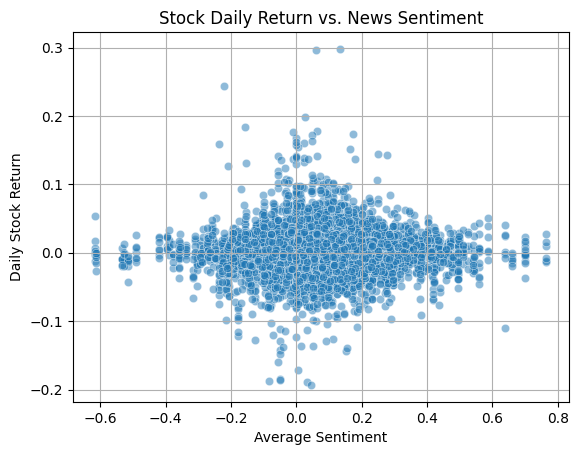

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
sns.scatterplot(data=merged_df, x='avg_sentiment', y='daily_return', alpha=0.5)
plt.title('Stock Daily Return vs. News Sentiment')
plt.xlabel('Average Sentiment')
plt.ylabel('Daily Stock Return')
plt.grid(True)
plt.show()


In [68]:
correlation = merged_df['avg_sentiment'].corr(merged_df['daily_return'])
print(f"Correlation between sentiment and daily stock return: {correlation:.4f}")


Correlation between sentiment and daily stock return: 0.0108


In [69]:
correlations = merged_df.groupby('stock')[['avg_sentiment', 'daily_return']].corr().iloc[0::2, -1].reset_index()
correlations.columns = ['stock', 'drop', 'correlation']
correlations = correlations[['stock', 'correlation']]
print(correlations)


  stock  correlation
0  AAPL     0.045359
1  AMZN    -0.001526
2  GOOG     0.024689
3  META    -0.010555
4  MSFT     0.028137
5  NVDA     0.026733
6  TSLA    -0.015817


In [70]:
merged_df['lagged_sentiment'] = merged_df.groupby('stock')['avg_sentiment'].shift(1)

# Recalculate correlation
lagged_corr = merged_df[['daily_return', 'lagged_sentiment']].corr().iloc[0, 1]
print(f"Lagged sentiment correlation: {lagged_corr:.4f}")


Lagged sentiment correlation: -0.0102


In [71]:
merged_df['sentiment_3d_avg'] = merged_df.groupby('stock')['avg_sentiment'].rolling(window=3).mean().reset_index(0, drop=True)


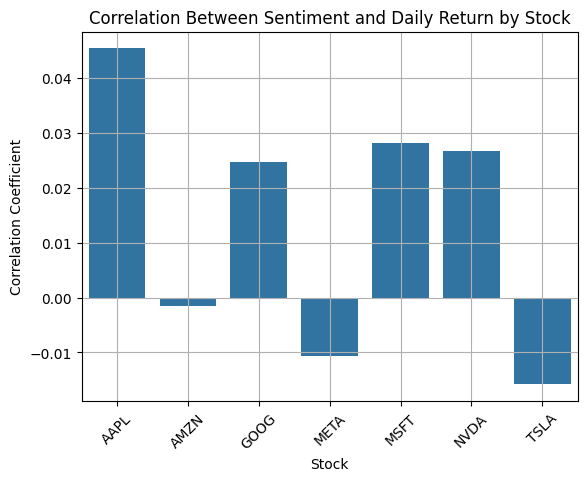

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='stock', y='correlation', data=correlations)
plt.title("Correlation Between Sentiment and Daily Return by Stock")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Stock")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
